#### Plotting MPAS diag with UXarray
- mesh plot
- grid plot
- surface temperature map
- mslp map
- Maximum wind map
- Relative humidity
#### Using the Dual MPAS grid
- MPAS Dual & Primal Grids
- Vorticity map
  
Ming Ge Feb 2025

reference:
- https://github.com/UXARRAY/uxarray/blob/main/docs/examples/visualization/e3sm-load-viz.ipynb
- https://uxarray.readthedocs.io/en/latest/examples/visualization/e3sm-load-viz.html
- https://projectpythia.org/unstructured-grid-viz-cookbook/notebooks/04-recipes/mpas-atmo.html

In [2]:
import uxarray as ux
import cartopy.crs as ccrs
import geoviews as gv
import geoviews.feature as gf
import warnings

In [3]:
dir_ghg = '/glade/campaign/mmm/c3we/mingge/MPAS-PGW/1993_PGW/'
dir_pgw = '/glade/derecho/scratch/mingge/MPAS-Model/1993_PGW'

flnm_grid = '/glade/campaign/mmm/c3we/mingge/MPAS-PGW/25-90km_PGW_tmp/x4.163842.grid_hawaii.nc'
flnm_data = dir_ghg +'diag.1993-12-01_00.00.00.nc'

uxds_mpas = ux.open_dataset(flnm_grid, flnm_data)
uxgrid_mpas = uxds_mpas.uxgrid

# Check Grid Property
uxgrid_mpas

<uxarray.Grid>
Original Grid Type: MPAS
Grid Dimensions:
  * n_node: 327680
  * n_edge: 491520
  * n_face: 163842
  * n_max_face_nodes: 10
  * n_max_face_edges: 10
  * n_max_face_faces: 10
  * n_max_node_faces: 3
  * two: 2
  * n_nodes_per_face: (163842,)
Grid Coordinates (Spherical):
  * node_lon: (327680,)
  * node_lat: (327680,)
  * edge_lon: (491520,)
  * edge_lat: (491520,)
  * face_lon: (163842,)
  * face_lat: (163842,)
Grid Coordinates (Cartesian):
  * node_x: (327680,)
  * node_y: (327680,)
  * node_z: (327680,)
  * edge_x: (491520,)
  * edge_y: (491520,)
  * edge_z: (491520,)
  * face_x: (163842,)
  * face_y: (163842,)
  * face_z: (163842,)
Grid Connectivity Variables:
  * face_node_connectivity: (163842, 10)
  * face_edge_connectivity: (163842, 10)
  * face_face_connectivity: (163842, 10)
  * edge_node_connectivity: (491520, 2)
  * edge_face_connectivity: (491520, 2)
  * node_face_connectivity: (327680, 3)
Grid Descriptor Variables:
  * face_areas: (163842,)
  * n_nodes_per_face: (163842,)
  * edge_face_distances: (491520,)
  * edge_node_distances: (491520,)

#### Surface Temperature

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude temperature_surface)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
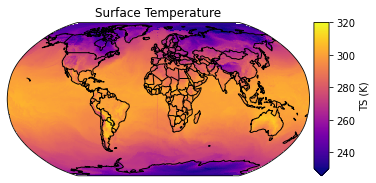

In [14]:
uxds_mpas.temperature_surface.isel(Time=0).plot(
    height=200,
    width=450,
    clim=(230, 320),
    clabel="TS (K)",
    backend="matplotlib",
    cmap="plasma",
    projection=ccrs.Robinson(),
    features=["borders", "coastline"],
    title="Surface Temperature",
)

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude mslp)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
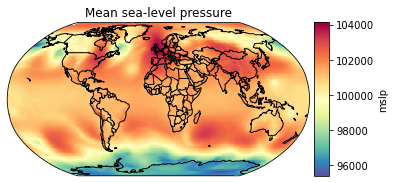

In [8]:
uxds_mpas.mslp.isel(Time=0).plot(
    #rasterize=False,
    height=200,
    width=450,
    #clim=(230, 320),
    #clabel="TS (K)",
    backend="matplotlib",
    cmap="spectral_r",
    projection=ccrs.Robinson(),
    features=["borders", "coastline"],
    title="Mean sea-level pressure",
)

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude wind_speed_level1_max)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]
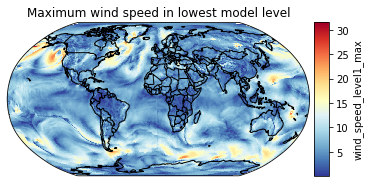

In [17]:
uxds_mpas.wind_speed_level1_max.isel(Time=0).plot(
    height=200,
    width=450,
    #clim=(230, 320),
    #clabel="TS (K)",
    backend="matplotlib",
    cmap="RdYlBu_r",
    projection=ccrs.Robinson(),
    features=["borders", "coastline"],
    title="Maximum wind speed in lowest model level",
)

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude relhum_200hPa)
   .Coastline.I :Feature   [Longitude,Latitude]
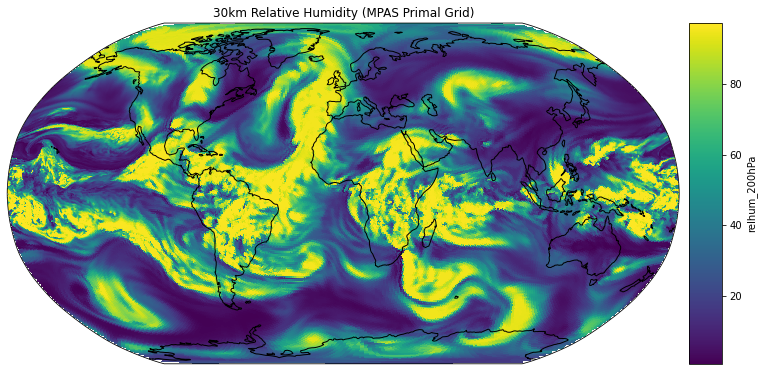

In [20]:
uxds_mpas['relhum_200hPa'][0].plot(projection=ccrs.Robinson(), backend='matplotlib', pixel_ratio=4.0, features=['coastline'], width=1000, height=500, cmap='viridis', title="30km Relative Humidity (MPAS Primal Grid)")


#### Using the Dual MPAS grid

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Overlay
   .Image.I     :Image   [Longitude,Latitude]   (Longitude_Latitude vorticity_200hPa)
   .Coastline.I :Feature   [Longitude,Latitude]
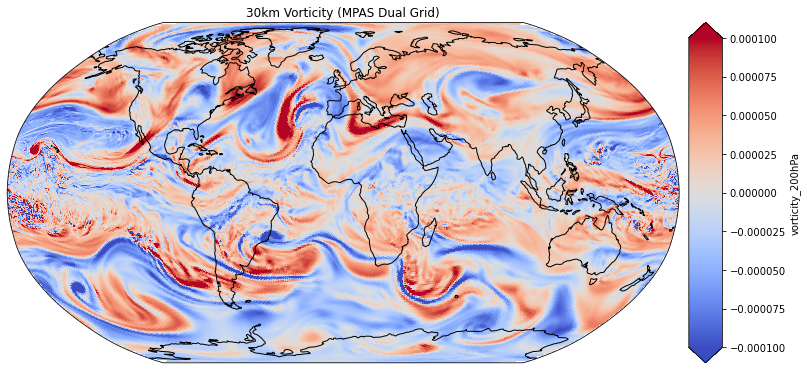

In [5]:
uxds_dual = ux.open_dataset(flnm_grid, flnm_data, use_dual=True)
uxds_dual['vorticity_200hPa'][0].plot(projection=ccrs.Robinson(), rasterize=True, backend='matplotlib', pixel_ratio=4.0, features=['coastline'], width=1000, height=500, cmap='coolwarm', title="30km Vorticity (MPAS Dual Grid)", clim=(-0.0001,0.0001))

#### MPAS  Dual & Primal Grids
- The primal grid consists of hexagonal cells that form the primary computational mesh
- The dual grid is composed of triangular cells that connect the centers of the primary hexagons.

:Layout
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]
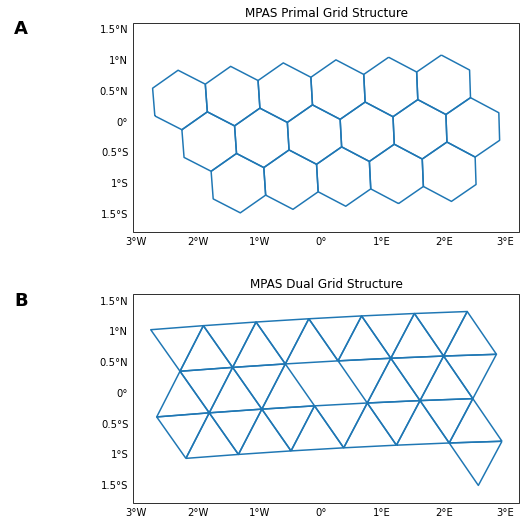

In [6]:
uxds_primal = ux.open_dataset(flnm_grid, flnm_data, use_dual=False)

(uxds_primal.uxgrid.subset.bounding_box(lon_bounds = (-3, 3), lat_bounds=(-1.5, 1.5)).plot(title="MPAS Primal Grid Structure", ) + 
 uxds_dual.uxgrid.subset.bounding_box(lon_bounds = (-3, 3), lat_bounds=(-1.5, 1.5)).plot(title="MPAS Dual Grid Structure")).cols(1).opts(fig_size=200)

:Overlay
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]
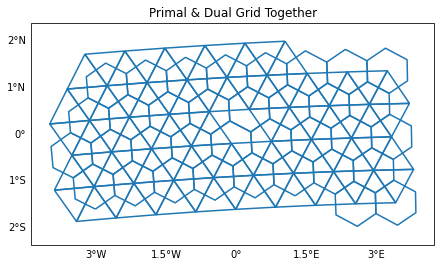

In [27]:
(uxds_primal.uxgrid.subset.bounding_box(lon_bounds = (-4, 4), lat_bounds=(-2, 2)).plot() * 
 uxds_dual.uxgrid.subset.bounding_box(lon_bounds = (-4, 4), lat_bounds=(-2, 2)).plot()).opts(fig_size=200, title="Primal & Dual Grid Together")
